GAUSSIAN MIXTURE MODEL (GMM)

In [4]:
import numpy as np
import random
import scipy.stats as st
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal as mvn
%matplotlib inline
import seaborn as sns
# sns.set_style("white")
from IPython.display import Image
from jupyterthemes import jtplot
jtplot.style()

In [38]:
class GMM():
    def __init__(self,data = [],n_cluster=3, tolerance= 0.01,max_iteration=100):
        self.data = preprocessing.normalize(data)  #debug line
        
        #self.data = data
        self.data_list = list(self.data)
        self.n_cluster = n_cluster
        self.tolerance = tolerance
        self.max_iteration = max_iteration
        self.iteration = 0
        
    def fit(self):
        
        n,p = self.data.shape
        k = self.n_cluster
        Cluster = []
        mus = []
        covariances = []
        pis = []
        # initialize the mean, covariances and mixing coefficients
#         for i in range(self.n_cluster):
#             pis[i] = 1/(self.n_cluster)
        pis = np.random.random_sample(k)
        mus = np.random.random_sample((k,p))
        
        u_mus = np.random.random_sample((k,p))  #debug line
#         covariance = np.zeros((k,p,p))
        covariance = np.random.random_sample((k,p,p))
        
        # a fix to initialize the covariance
        for i in range(k):
            min_eig = np.min(np.real(np.linalg.eigvals(covariance[i])))
            if min_eig < 0:
                covariance -= 10 * min_eig * np.eye(*covariance[i].shape)
        #print(covariance)  #debug line
        
        initial_logLikelihood = 0.0  #initialize log likelihood
        

        for o in range(self.max_iteration):
            
            # E-step
            ws = np.zeros((k,n))      # ws = gamma function
            for i in range(k):
                for j in range(n):
                    #print(pis[j])
                    ws[i,j] = pis[i] * mvn(mus[i], covariance[i]).pdf(self.data_list[j])
            ws /= ws.sum(0)   #adds by column

            # M-step
            for i in range(k):
                for j in range(n):
                    pis[i] += ws[i,j]            
            pis /= n   
            
            for i in range(k):
                for j in range(n):
                    mus[i] += ws[i,j] * self.data_list[j]
                mus[i] /= ws[i,:].sum()
                u_mus[i] = mus[i] * ws[i,:].sum() #debug line
            
            for i in range(k):
                for j in range(n):
                    ys = np.reshape(self.data_list[j] - mus[i], (2,1)) #change later
                    #ys = self.data_list[j] - mus[i]
                    covariance[i] +=  ws[i,j] * np.dot(ys,ys.T)
                covariance[i] /= ws[i,:].sum()
            
            # update complete log likelihood
            new_loglikelihood = 0.0
            for i in range(n):
                s = 0.0
                for j in range(k):
                    s += pis[j] * mvn(mus[j],covariance[j]).pdf(self.data[i])
                new_loglikelihood += np.log(s)
            if np.abs(new_loglikelihood - initial_logLikelihood) < self.tolerance:
                break
            initial_logLikelihood = new_loglikelihood
            self.iteration += 1
        #return pis, covariance, mus,u_mus, self.iteration
        return pis, covariance, mus, self.iteration
    


          V1         V2
0   2.072345  -3.241693
1  17.936710  15.784810
2   1.083576   7.319176
3  11.120670  14.406780
4  23.711550   2.557729
(3000, 2)
(array([0.31024397, 0.43611434, 0.25397513]), array([[[ 0.0003581 ,  0.00204073],
        [ 0.00204073,  0.01414481]],

       [[ 0.01006959, -0.00664505],
        [-0.00664505,  0.00447737]],

       [[ 0.31381073, -0.08465395],
        [-0.08465395,  0.2872116 ]]]), array([[ 0.98401201, -0.13912596],
       [ 0.55476914,  0.82413871],
       [ 0.4512121 ,  0.44410232]]), 44)


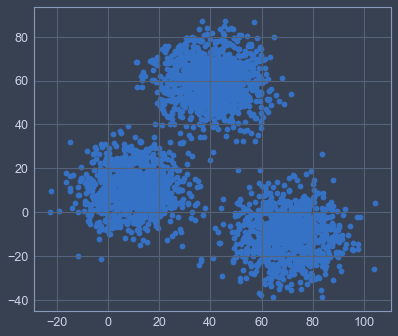

In [40]:
# from sklearn.datasets.samples_generator import make_blobs
# X, y_true = make_blobs(n_samples=10, centers=4,
#                        cluster_std=0.60, random_state=0)
# X = X[:, ::-1] # flip axes for better plotting
# #plt.scatter(X[:, 0], X[:, 1], c='red', s=40, cmap='viridis');

# g = GMM(X)
# print(g.fit())

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('kmeans/xclara.csv')
print(data.head(5))

plt.figure()
#plt.subplot(1,2,1)
plt.scatter(data['V1'],data['V2'])
# print(np.shape(data))
data1 = data['V1']
data2 = data['V2']
data_array = np.array(data)
print(data_array.shape)

data_list = list(data_array)
data_col = [data1,data2]
# data_col.append(data1)
# data_col.append(data2)
#data_col = np.array(data_col)
g = GMM(data_array)
t = g.fit()
print(t)

# def plot_gmm(t):
#         x = np.linspace(-1,1,600)
#         y = []
#         #for i in range(len(t[0])):
#         for i in range(3):
#             a,b = np.mgrid[-3:3:0.01,-3:3:0.01]
#             pos = np.empty(a.shape + (2,))
#             pos[:,:,0] = a
#             pos[:,:,1] = b
#             p = mvn(mean=t[2][i], cov=t[1][i]).pdf(pos)
#             y.append(p)
#             plt.subplot(1,2,2)
#             fig = plt.figure()
#             ax = fig.gca(projection='3d')
#             ax.plot_surface(a,b,p,rstride=3, cstride=3)
#             #plt.plot(x,y[0])
#             ax.contourf(x,x,y[0])
#plot_gmm(t)
            

(400, 2)

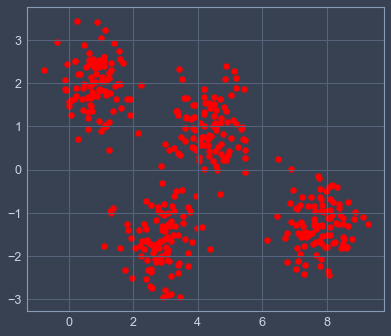

In [24]:
# Generate some data
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
plt.scatter(X[:, 0], X[:, 1], c='red', s=40, cmap='viridis');


np.shape(X)

#g = GMM(X,n_cluster=3)
#print(g.k)

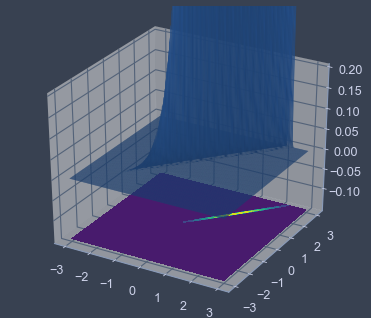

In [25]:
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
mu = np.array([1,1.5])
#sigma = [[-0.5, 1], [-1,1.5]]
sigma = np.random.random_sample((2,2))
min_eig = np.min(np.real(np.linalg.eigvals(sigma)))
if min_eig < 0:
    sigma -= 10 * min_eig * np.eye(*sigma.shape)
a,b = np.mgrid[-3:3:0.01,-3:3:0.01]
# x = {i: zip(a[i],b[i]) for i in range(1)}
pos = np.empty(a.shape + (2,))
pos[:,:,0] = a
pos[:,:,1] = b
p = mvn(mean=mu, cov=sigma).pdf(pos)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(a,b,p,rstride=3, cstride=3)
cset = ax.contourf(a,b,p, zdir = 'z', offset = -0.15)
ax.set_zlim(-0.15,0.2)
plt.show()
# for i in range(200):
#     x =[a[i:,0],b[i:,1]]
#     p[i] = mvn(mean=mu, cov=sigma).pdf(x)
#     t.append(p[i])
#plt.plot(x, p)

## 

In [ ]:
# def f(x,y):
#     z = np.column_stack([x.ravel(), y.ravel()])
#     return (mvn())
mu = [0,5]
#cova = [[-1,2],[-1,1]]
cova = np.random.random_sample((2,2))

s  = 200
x = np.linspace(-3,6,s)
y = np.linspace(-3,8,s)
X,Y = np.meshgrid(x,y)
z = np.column_stack([x.ravel(), y.ravel()])
p = mvn(mean=mu, cov=cova).pdf(z)
Z = np.reshape(p,(s,s))

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, cmap='jet')
plt.title('Gaussian Model')


In [ ]:
def f(x,y):
    #mu = [0,5]
    #cova = np.random.random_sample((2,2))
    mu = [ 0.31381075, -0.084652  ]
    cova = [[ 0.01006956, -0.00664503],[-0.00664503,  0.00447735]]
    z = np.column_stack([x.ravel(), y.ravel()])
    #return mvn([0,5], 3*np.eye(2)).pdf(z)
    return mvn(mu,cova).pdf(z)
s = 200
x = np.linspace(-0.3,0.6,s)
y = np.linspace(-0.3,0.8,s)
X,Y = np.meshgrid(x,y)
Z = np.reshape(f(X,Y), (s,s))
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z, rstride=3, cstride=3,cmap='jet')
plt.title('Gaussian Model')

In [ ]:
from sklearn import preprocessing as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('kmeans/xclara.csv')
x1 = np.array(data['V1'])
x2 = np.array(data['V2'])
#n = len(x1)
data_array = np.array(data)
# x1 = x1.reshape(n,1)
# x2 = x2.reshape(n,1)

#norm_x1 = pp.normalize(x1,norm='l2')
#norm_x2 = pp.normalize(x2,norm='l2')
norm_data = pp.normalize(data_array)
pp.
x1 = []
x2 = []
for i in range(len(norm_data)):
    x1.append(norm_data[i][0])
    x2.append(norm_data[i][1])
print(data.head(5))
plt.figure()
#plt.subplot(1,2,1)
#plt.scatter(data['V1'],data['V2'])
plt.scatter(x1, x2)
# print(np.shape(data))


In [ ]:
def standardize_data(data):
    new_data = []
    data_mean = np.mean(data)
    data_std = np.std(data)
    
    for i in range(len(data)):
        temp = (data[i] - data_mean)/ data_std
        new_data.append(temp)
    return new_data
from sklearn import preprocessing as pp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('kmeans/xclara.csv')
x1 = np.array(data['V1'])
x2 = np.array(data['V2'])

x1 = standardize_data(x1)
x2 = standardize_data(x2)
plt.scatter(x1, x2)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('kmeans/xclara.csv')
print(data.head(5))
data_array = np.array(data)
print(data_array.shape)
plt.figure()
#plt.subplot(1,2,1)
plt.scatter(data['V1'],data['V2'])

g = GMM(data_array)
#u = g.fit()
print(t)

In [ ]:
print(t)

In [ ]:
t

In [ ]:
t
